# Matplotlib 101

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

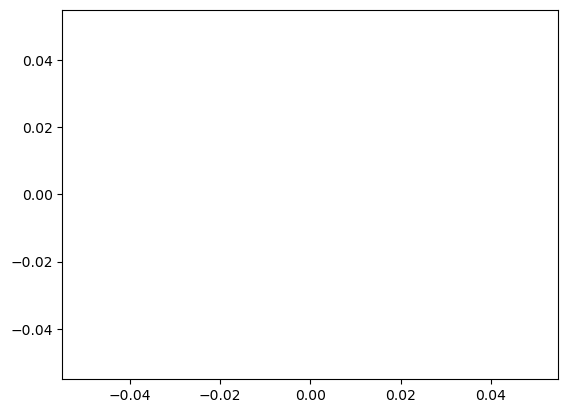

In [5]:
plt.plot();
plt.show();

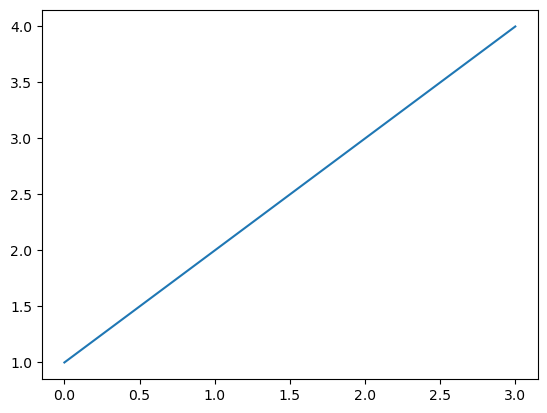

In [7]:
plt.plot([1,2,3,4]);

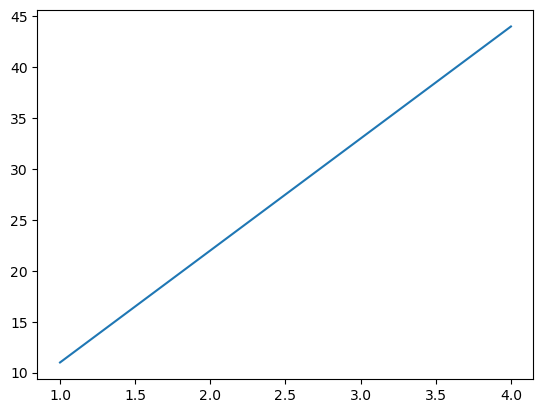

In [9]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y);

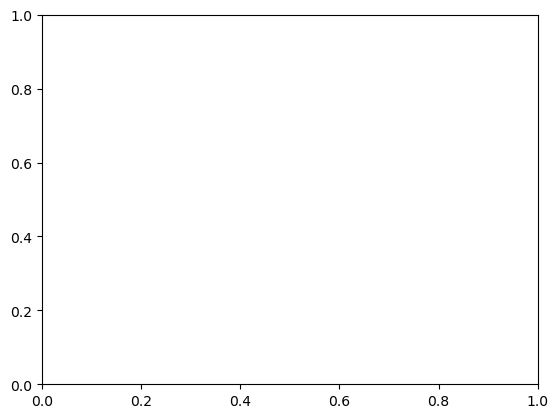

In [10]:
# first method:
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

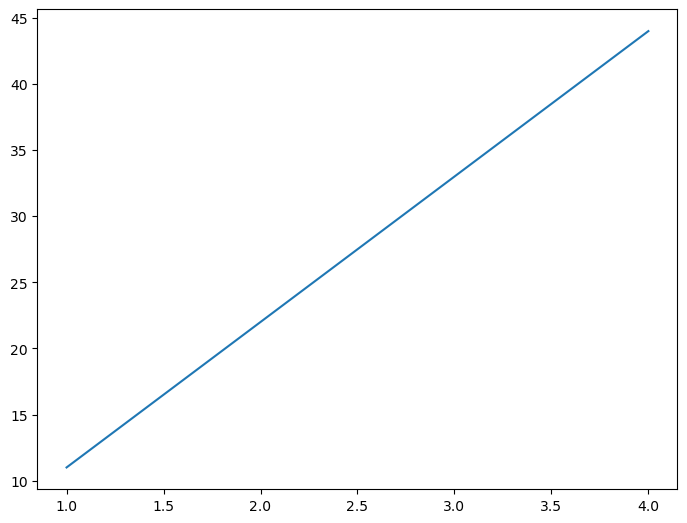

In [12]:
# second method:
fig = plt.figure()
ax = fig.add_subplot([1,1,1,1])
ax.plot(x,y)
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

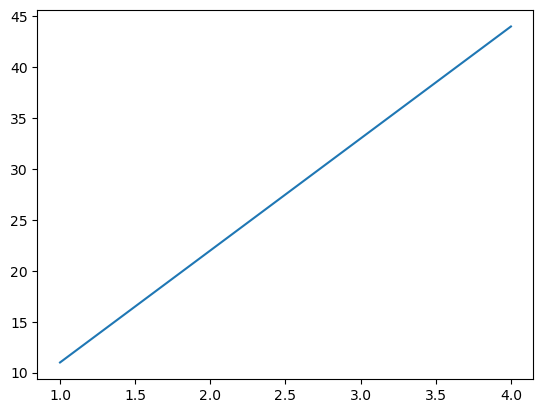

In [15]:
# recommended usage:
fig, ax = plt.subplots()
ax.plot(x,y)
type(fig), type(ax)

## Matplotlib Workflow example

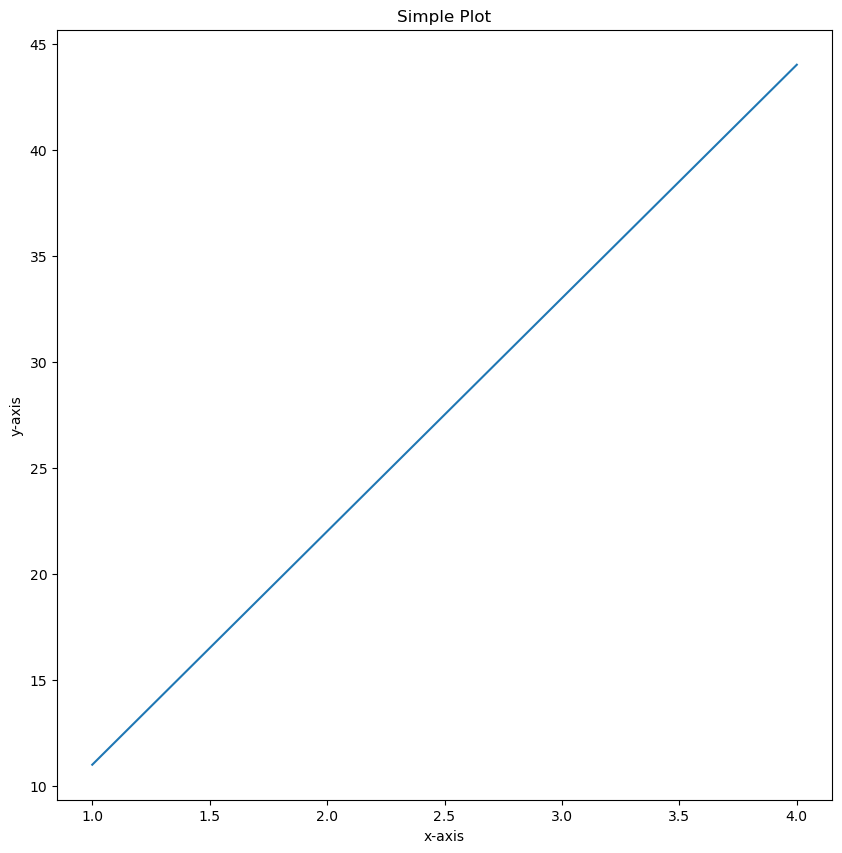

In [18]:
# step 0: import the lib
# import matplotlib.pyplot as plt

# step 1: prepare the data:
x = [1,2,3,4]
y = [11,22,33,44]

# step 2: setup the plot
fig, ax = plt.subplots(figsize=(10,10))

# step 3: plot data
ax.plot(x,y)

# step 4: customize plot
ax.set(title="Simple Plot",
       xlabel="x-axis",
       ylabel="y-axis")

# step 5: save & show the figure
fig.savefig("./images/sample-plot.png")

## Making figures with NumPy arrays

In [3]:
x = np.linspace(0,10,100)
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [4]:
x.dtype

dtype('float64')

In [5]:
x.ndim

1

In [6]:
x.shape

(100,)

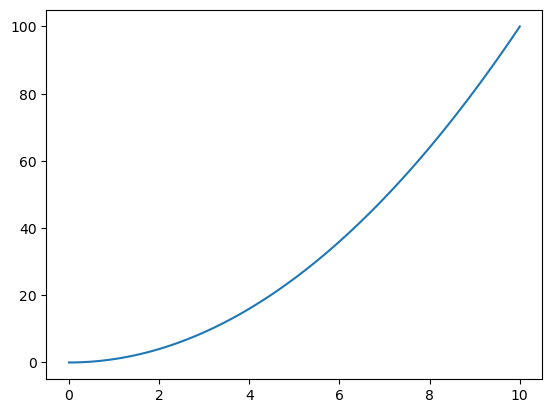

In [10]:
# default is line:
fig, ax = plt.subplots()
ax.plot(x,x**2);

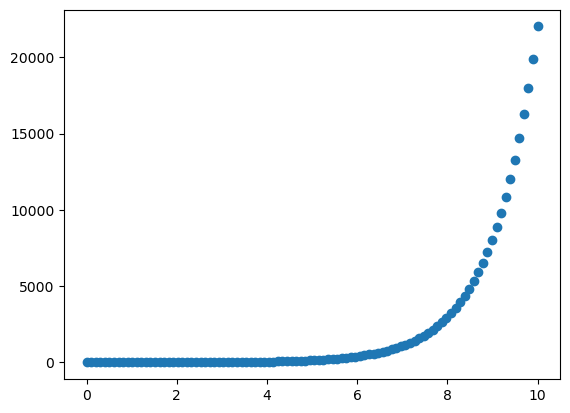

In [11]:
# scatter plot:
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

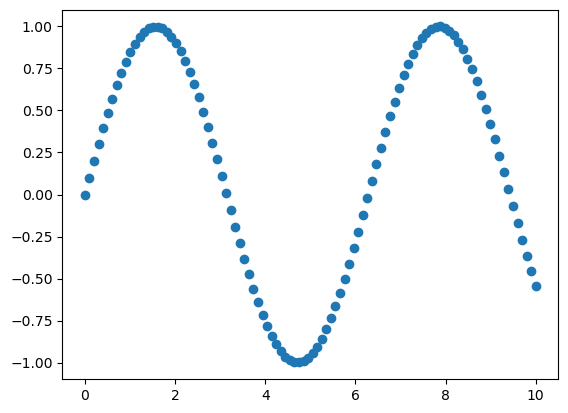

In [12]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

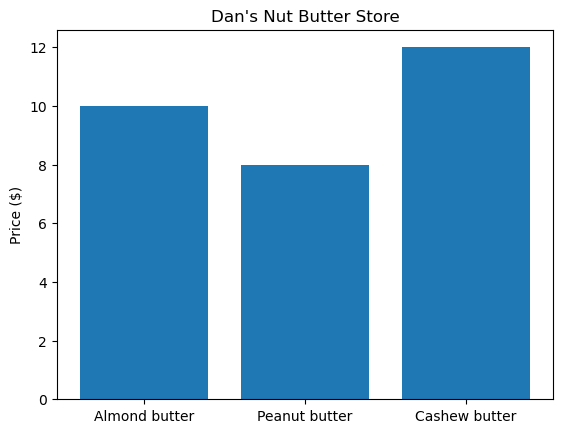

In [18]:
# from a dictionary:
nut_butter_prices = {
    "Almond butter": 10,
    "Peanut butter": 8,
    "Cashew butter": 12
}

fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax.set(title="Dan's Nut Butter Store",
       ylabel="Price ($)");

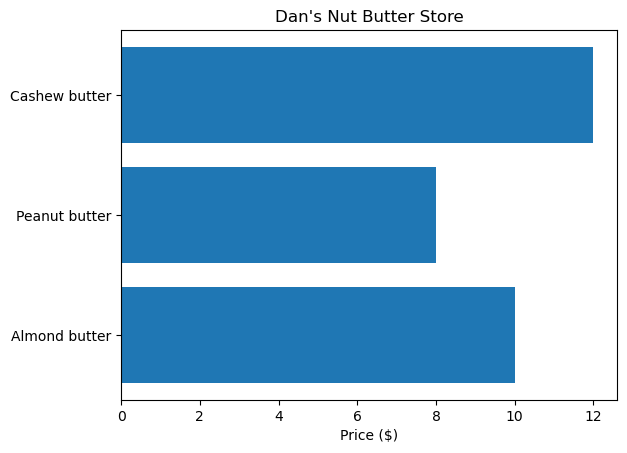

In [24]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));
ax.set(title="Dan's Nut Butter Store",
       xlabel="Price ($)");

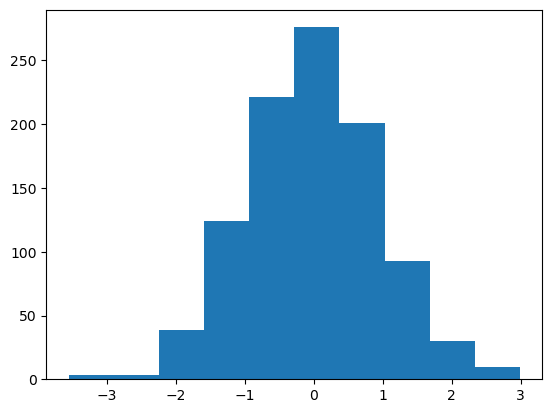

In [26]:
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

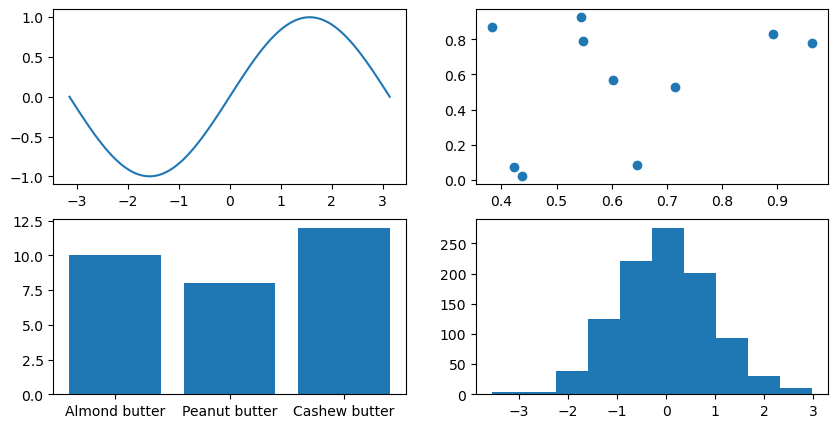

In [60]:
# first subplot option: 
np.random.seed(0)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
                                          ncols=2,
                                          figsize=(10,5));
ax1.plot(np.linspace(-np.pi,np.pi,100),np.sin(np.array(np.linspace(-np.pi,np.pi,100))));
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(x);

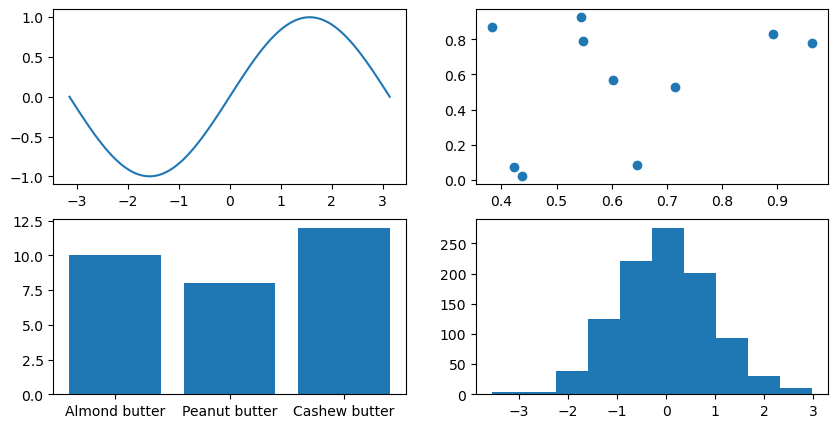

In [64]:
# second subplot option: 
np.random.seed(0)
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                    figsize=(10,5));

ax[0,0].plot(np.linspace(-np.pi,np.pi,100),np.sin(np.array(np.linspace(-np.pi,np.pi,100))));
ax[0,1].scatter(np.random.random(10), np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1,1].hist(x);

## Making figures with Pandas


In [81]:
car_sales = pd.read_csv("../pandas-data-analysis/car-sales.csv", index_col=0)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


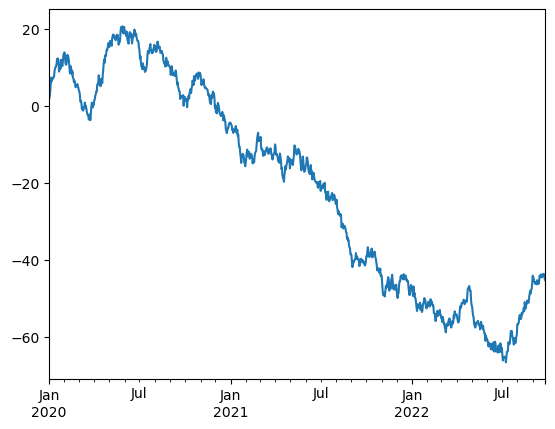

In [79]:
np.random.seed(0)
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range("1/1/2020", periods=1000)
              )

ts = ts.cumsum()
ts.plot();

In [82]:
car_sales["Price"] = car_sales["Price"].replace('[\$\,\.]', '', regex=True)
car_sales["Price"] = car_sales["Price"].replace('', np.nan)
car_sales = car_sales.dropna(subset=["Price"])
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales["Price"] = car_sales["Price"] // 100
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [85]:
car_sales["Sales Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sales Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [87]:
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sales Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


<Axes: xlabel='Sales Date'>

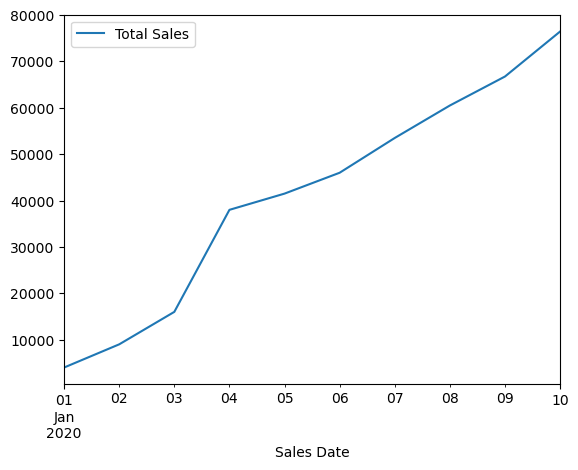

In [90]:
car_sales.plot(x="Sales Date", y="Total Sales")

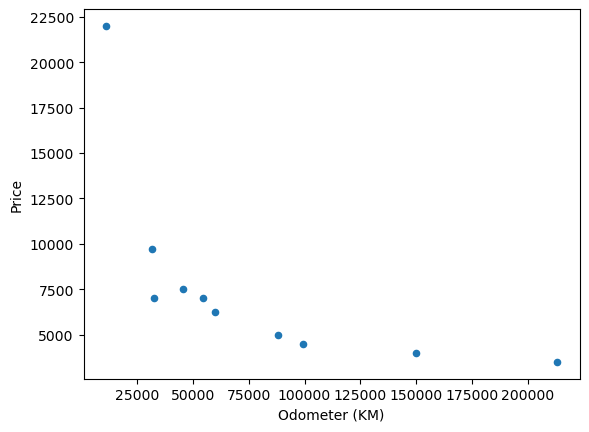

In [93]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [99]:
np.random.seed(0)
x = np.random.randn(10,4)
x.ndim, x.shape
# x

df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


<Axes: >

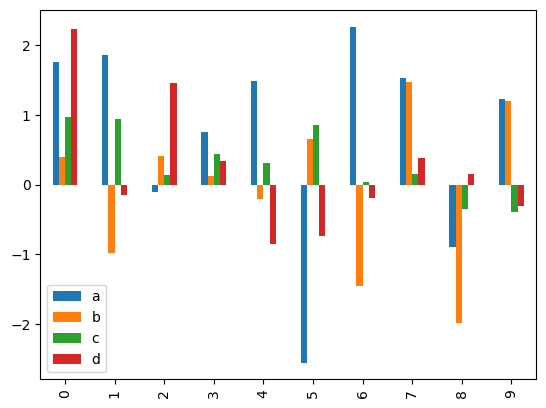

In [100]:
df.plot.bar()

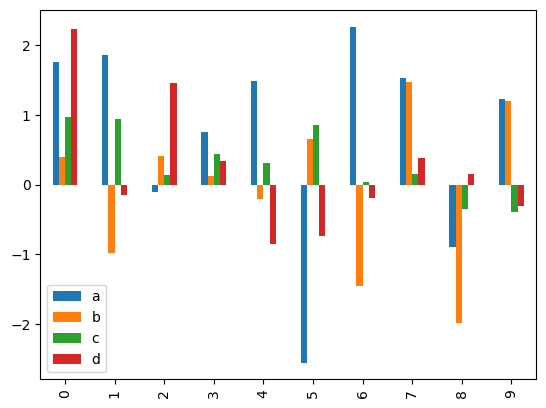

In [102]:
df.plot(kind="bar");

In [103]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sales Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


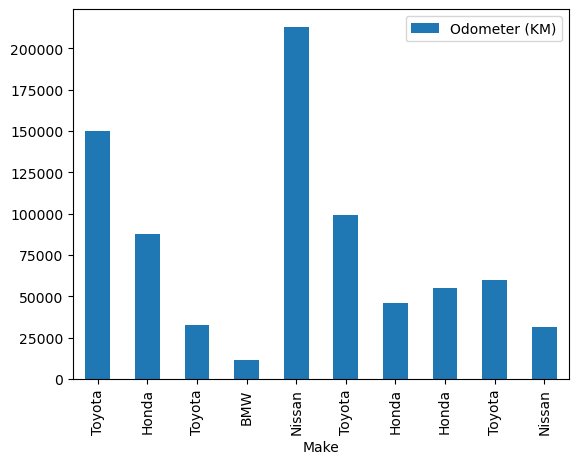

In [105]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

<Axes: ylabel='Frequency'>

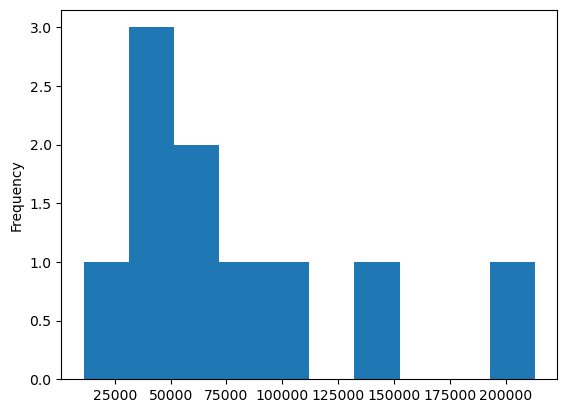

In [106]:
car_sales["Odometer (KM)"].plot.hist()

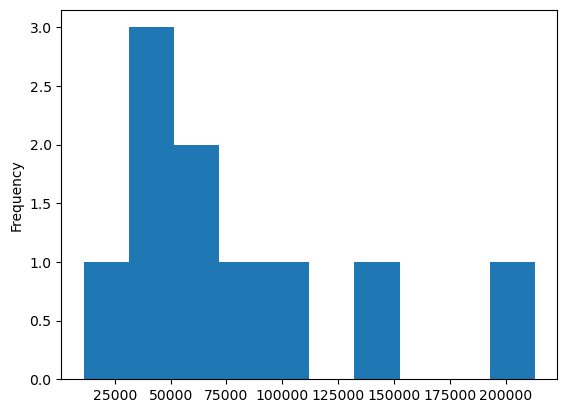

In [110]:
car_sales["Odometer (KM)"].plot(kind="hist");

<Axes: ylabel='Frequency'>

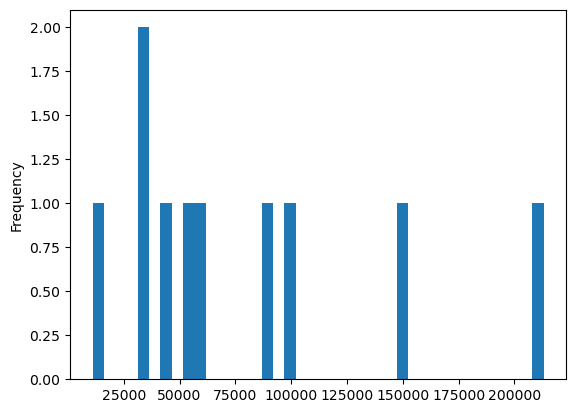

In [111]:
car_sales["Odometer (KM)"].plot.hist(bins=40)

In [112]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


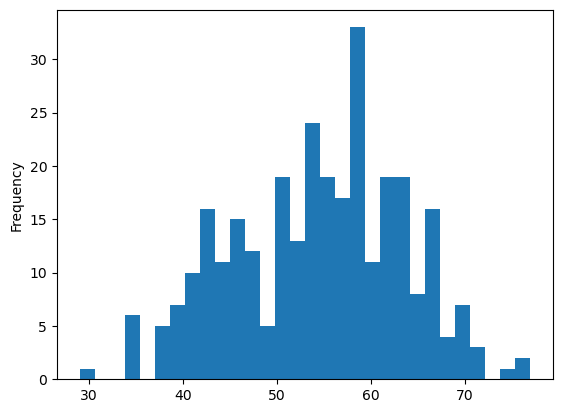

In [116]:
heart_disease["age"].plot.hist(bins=30);

In [117]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

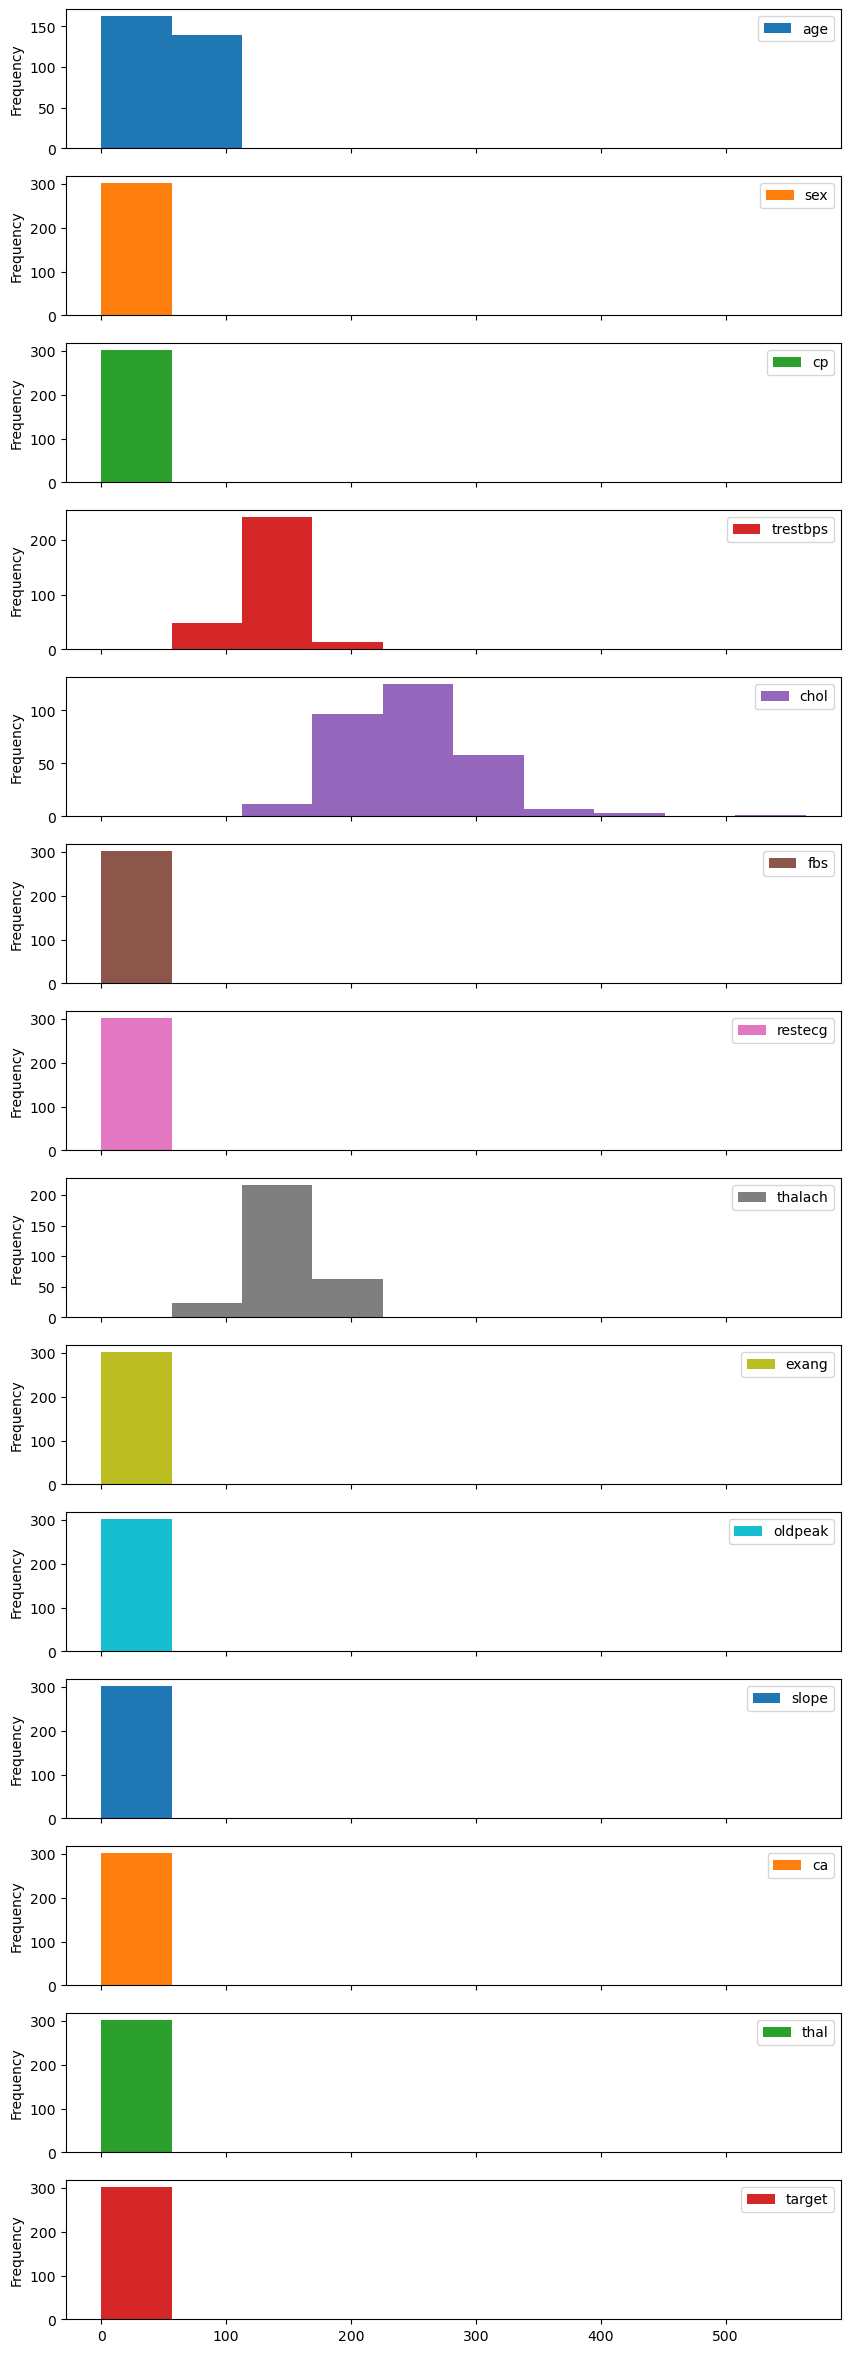

In [119]:
heart_disease.plot.hist(figsize=(10,30),subplots=True);

In [121]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


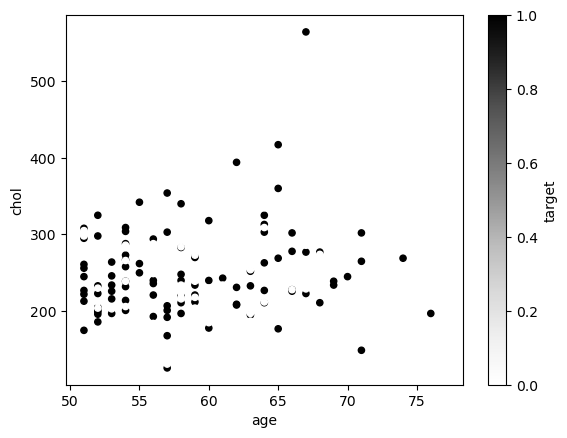

In [123]:
# pyplot method:
over_50.plot(kind="scatter", x="age", y="chol", c="target");

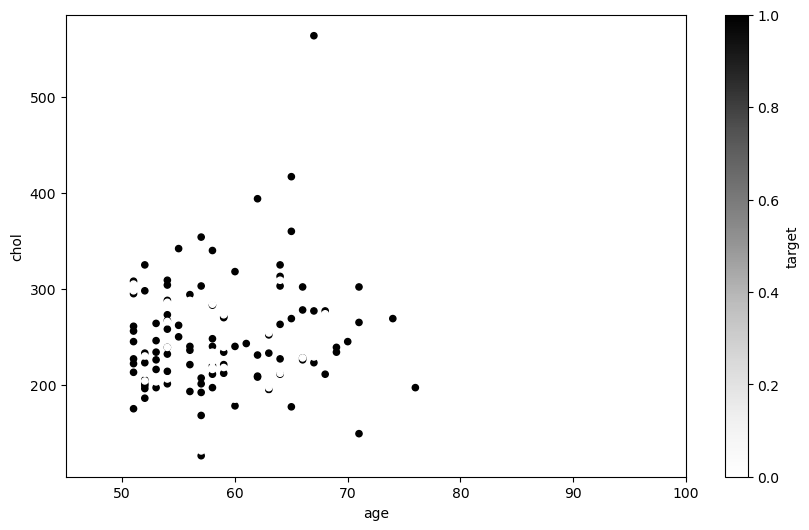

In [131]:
# OO method with pyplot:
fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind="scatter", x="age", y="chol", c="target", ax=ax);

ax.set_xlim([45,100]);

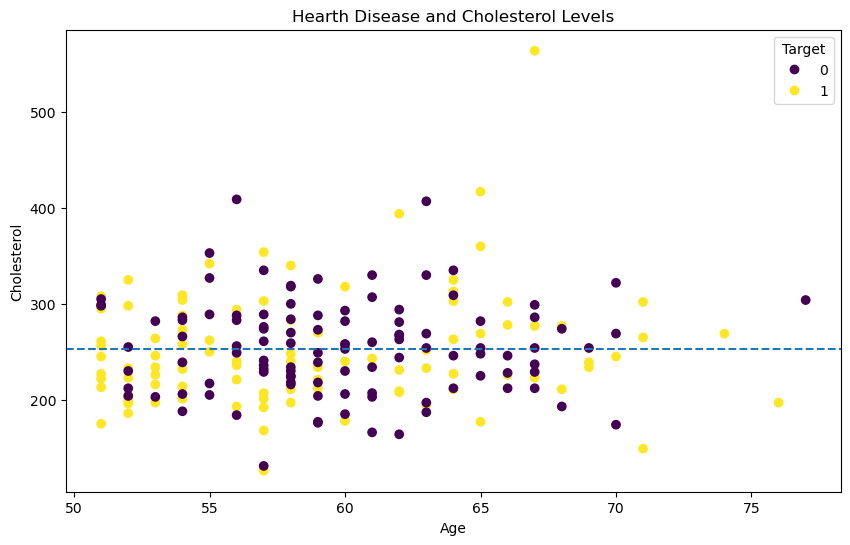

In [145]:
# OO method from scratch:
fig, ax = plt.subplots(figsize=(10,6))

# step 1 - plot the data:
scatter = ax.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"]);

# step 2 - customixe the title, and x,y labels:
ax.set(title="Hearth Disease and Cholesterol Levels",
        xlabel="Age",
        ylabel="Cholesterol");

# step 3 - add a legend:
ax.legend(*scatter.legend_elements(),title="Target");

# step 4 - add an horizontal line (x-axis):
ax.axhline(over_50["chol"].mean(), linestyle="--");

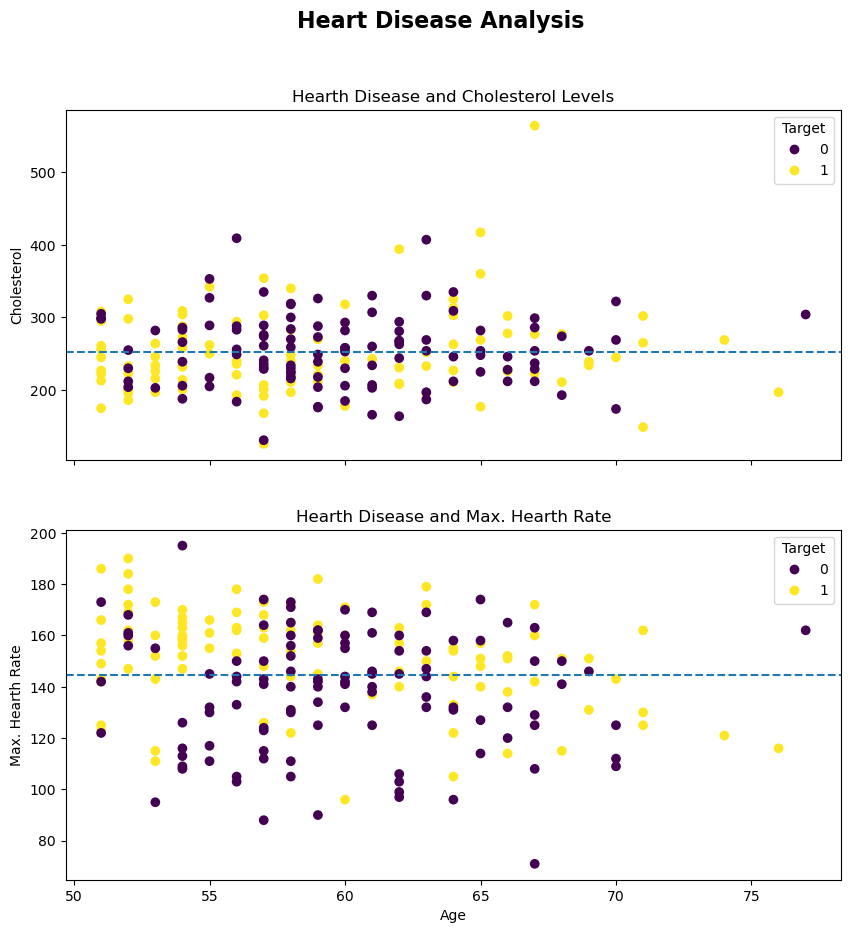

In [162]:
# OO method from scratch:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1,figsize=(10,10), sharex=True)

# step 1 - plot the data:
scatter0 = ax0.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"]);
scatter1 = ax1.scatter(x=over_50["age"], y=over_50["thalach"], c=over_50["target"]);

# step 2 - customixe the title, and x,y labels:
ax0.set(title="Hearth Disease and Cholesterol Levels",
        ylabel="Cholesterol");

ax1.set(title="Hearth Disease and Max. Hearth Rate",
        xlabel="Age",
        ylabel="Max. Hearth Rate");

# step 3 - add a legend:
ax0.legend(*scatter0.legend_elements(),title="Target");
ax1.legend(*scatter1.legend_elements(),title="Target");

# step 4 - add an horizontal line (x-axis):
ax0.axhline(over_50["chol"].mean(), linestyle="--");
ax1.axhline(over_50["thalach"].mean(), linestyle="--");

# step 5 - adjust the padding between the subplots:
# fig.tight_layout(pad=3.0)

# step 6 - add a title for the whole subplots figure:
fig.suptitle("Heart Disease Analysis", fontsize="16", fontweight="bold");